# Exploratory Data Visualisation - AWID2

In [1]:
import os
os.chdir('D:\Birkbeck\MSc Data Science\Year 2\AML\Course work\Coursework Dataset-20211201')
filename = 'train_imperson_without4n7_balanced_data.csv'

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision',3)

In [3]:
#Import column labels into a list for easier reference, columns 4 and 7 removed as in the data. Duplicate name amended:
labels_data = open('Column labels AWID2.csv')
labels_lst = []
for label in labels_data:
    label = label.rstrip()
    labels_lst.append(label)

In [4]:
#Create DF with the column labels, removing current numeric reference at header:
train_df = pd.read_csv('train_imperson_without4n7_balanced_data.csv')
train_df.columns = labels_lst
print(train_df.head())
print(train_df.info())
print(train_df.shape)

   frame.interface_id  frame.dlt  frame.offset_shift  frame.time_delta  \
0                   0          0                   0         6.570e-05   
1                   0          0                   0         1.430e-05   
2                   0          0                   0         3.553e-02   
3                   0          0                   0         5.128e-03   
4                   0          0                   0         3.512e-02   

   frame.time_delta_displayed  frame.len  frame.cap_len  frame.marked  \
0                   6.570e-05      0.009          0.009             0   
1                   1.430e-05      0.000          0.000             0   
2                   3.553e-02      0.071          0.071             0   
3                   5.128e-03      0.095          0.095             0   
4                   3.512e-02      0.071          0.071             0   

   frame.ignored  radiotap.version  radiotap.pad  radiotap.length  \
0              0                 0             

In [5]:
#class distribution check:
print(train_df.groupby('class').size())

class
0    48522
1    48522
dtype: int64


In [6]:
#removing columns with same data for all instances before further investigation
#Columns with only 0 or 1s have std of 0.
train_df_std = train_df.std()

zero_col_lst = []
for column in labels_lst:
    if (train_df_std[column] == 0):
        zero_col_lst.append(column)

print("Number of zero std columns:",len(zero_col_lst))
print("Non Zero std/Remaining columns: ", 153-len(zero_col_lst))

Number of zero std columns: 74
Non Zero std/Remaining columns:  79


In [7]:
#remove zero sum columns from training data for visualisation tasks.
train_data = train_df.drop(columns = zero_col_lst, inplace = False)
train_data.head()

,frame.time_delta,frame.time_delta_displayed,frame.len,frame.cap_len,radiotap.length,radiotap.present.tsft,radiotap.present.flags,radiotap.present.channel,radiotap.present.dbm_antsignal,radiotap.present.antenna,radiotap.present.rxflags,radiotap.mactime,radiotap.flags.fcs,radiotap.datarate,radiotap.channel.freq,radiotap.channel.type.cck,radiotap.channel.type.ofdm,radiotap.channel.type.2ghz,radiotap.dbm_antsignal,radiotap.antenna,wlan.fc.type_subtype,wlan.fc.type,wlan.fc.subtype,wlan.fc.ds,wlan.fc.retry,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.duration,wlan.ra,wlan.da,wlan.ta,wlan.sa,wlan.bssid,wlan.seq,wlan.bar.type,wlan.ba.control.ackpolicy,wlan.ba.control.cbitmap,wlan.ba.bm,wlan.fcs_good,wlan_mgt.fixed.capabilities.ess,wlan_mgt.fixed.capabilities.privacy,wlan_mgt.fixed.capabilities.preamble,wlan_mgt.fixed.capabilities.spec_man,wlan_mgt.fixed.capabilities.short_slot_time,wlan_mgt.fixed.listen_ival,wlan_mgt.fixed.current_ap,wlan_mgt.fixed.status_code,wlan_mgt.fixed.timestamp,wlan_mgt.fixed.beacon,wlan_mgt.fixed.aid,wlan_mgt.fixed.reason_code,wlan_mgt.fixed.auth.alg,wlan_mgt.fixed.auth_seq,wlan_mgt.fixed.category_code,wlan_mgt.fixed.sequence,wlan_mgt.tagged.all,wlan_mgt.ssid,wlan_mgt.ds.current_channel,wlan_mgt.tim.dtim_count,wlan_mgt.tim.dtim_period,wlan_mgt.tim.bmapctl.multicast,wlan_mgt.country_info.environment,wlan_mgt.rsn.version,wlan_mgt.rsn.gcs.type,wlan_mgt.rsn.pcs.count,wlan_mgt.rsn.akms.count,wlan_mgt.rsn.akms.type,wlan_mgt.rsn.capabilities.ptksa_replay_counter,wlan_mgt.tcprep.trsmt_pow,wlan.wep.iv,wlan.wep.key,wlan.wep.icv,wlan.tkip.extiv,wlan.ccmp.extiv,wlan.qos.tid,wlan.qos.priority,data.len,class
0,6.570e-05,6.570e-05,0.009,0.009,1,1,1,1,1,1,1,0.369,1,0.887,0.981,0,1,1,0.704,1,0.818,1.0,0.308,0.5,0,1,0,0,0.003,1.127e-03,0.012,1.443e-03,1.440e-03,1.474e-03,0.946,0,0,0,0.0,1,0,0,0,0,0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0,0.0,0.0,0.0,0,0.000e+00,0.000,0.000,0.000,0,0.0,0.000e+00,0.000,0.000e+00,0.000e+00,0,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.430e-05,1.430e-05,0.000,0.000,1,1,1,1,1,1,1,0.369,1,0.434,0.981,0,1,1,0.704,1,0.659,0.5,1.000,0.0,0,0,0,0,0.000,2.253e-03,0.000,0.000e+00,0.000e+00,0.000e+00,0.000,0,0,0,0.0,1,0,0,0,0,0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0,0.0,0.0,0.0,0,0.000e+00,0.000,0.000,0.000,0,0.0,0.000e+00,0.000,0.000e+00,0.000e+00,0,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3.553e-02,3.553e-02,0.071,0.071,1,1,1,1,1,1,1,0.369,1,0.000,0.981,1,0,1,0.592,1,0.182,0.0,0.615,0.0,0,0,0,0,0.000,5.634e-04,0.006,1.731e-03,1.728e-03,1.474e-03,0.255,0,0,0,0.0,1,1,1,0,0,1,0.0,0.0,0.0,0.048,0.002,0.0,0.0,0,0.0,0.0,0.0,1,1.459e-03,0.462,0.000,0.008,0,0.0,0.000e+00,0.000,0.000e+00,0.000e+00,0,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,5.128e-03,5.128e-03,0.095,0.095,1,1,1,1,1,1,1,0.369,1,0.000,0.981,1,0,1,0.141,1,0.182,0.0,0.615,0.0,0,0,0,0,0.000,5.634e-04,0.006,8.655e-04,8.641e-04,8.847e-04,0.073,0,0,0,0.0,1,1,1,1,0,1,0.0,0.0,0.0,0.168,0.002,0.0,0.0,0,0.0,0.0,0.0,1,8.754e-04,0.462,0.000,0.004,0,0.0,1.540e-05,0.008,3.090e-05,1.580e-05,1,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,3.512e-02,3.512e-02,0.071,0.071,1,1,1,1,1,1,1,0.369,1,0.000,0.981,1,0,1,0.620,1,0.182,0.0,0.615,0.0,0,0,0,0,0.000,5.634e-04,0.006,1.731e-03,1.728e-03,1.474e-03,0.257,0,0,0,0.0,1,1,1,0,0,1,0.0,0.0,0.0,0.048,0.002,0.0,0.0,0,0.0,0.0,0.0,1,1.459e-03,0.462,0.005,0.008,0,0.0,0.000e+00,0.000,0.000e+00,0.000e+00,0,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Visualise Data  
### Correlation 

In [8]:
correlations = train_data.corr(method='pearson')
#print(correlations)
#too many to see anything helpful

In [9]:
#Correlation to target
print(correlations["class"].sort_values())

wlan.fc.subtype                                  -0.839
radiotap.channel.type.ofdm                       -0.652
radiotap.datarate                                -0.619
wlan.seq                                         -0.494
wlan.qos.priority                                -0.453
wlan.qos.tid                                     -0.453
frame.len                                        -0.438
frame.cap_len                                    -0.438
data.len                                         -0.435
wlan.duration                                    -0.296
wlan.fc.retry                                    -0.285
wlan_mgt.fixed.reason_code                       -0.257
wlan.da                                          -0.202
wlan_mgt.tim.dtim_period                         -0.183
wlan_mgt.fixed.capabilities.preamble             -0.168
wlan_mgt.fixed.timestamp                         -0.151
wlan_mgt.rsn.akms.count                          -0.148
wlan_mgt.rsn.version                            

### Skew

In [10]:
skewsort = train_data.skew().sort_values()

print(skewsort.head(10))
print(skewsort.tail(10))

wlan.fcs_good                    -67.958
radiotap.antenna                 -67.958
radiotap.flags.fcs               -67.958
radiotap.present.rxflags         -67.958
radiotap.channel.type.2ghz       -67.958
radiotap.present.dbm_antsignal   -67.958
radiotap.present.channel         -67.958
radiotap.present.antenna         -67.958
radiotap.present.tsft            -67.958
radiotap.length                  -67.958
dtype: float64
wlan.ba.control.cbitmap                           110.127
wlan.ba.control.ackpolicy                         127.167
wlan_mgt.fixed.sequence                           148.691
wlan_mgt.fixed.category_code                      179.850
wlan.ba.bm                                        181.116
wlan_mgt.fixed.current_ap                         211.958
wlan.bar.type                                     220.274
wlan_mgt.tcprep.trsmt_pow                         311.519
wlan_mgt.rsn.capabilities.ptksa_replay_counter    311.519
wlan_mgt.fixed.capabilities.spec_man              311

The volume of features create difficulty in meaningful visualisation. 2 step approach next:

1) Use SelectKBest and chi2 to select top 10 attributes for review. 

2) Split the data into the four categories based on the prefix of the feature names:
    -frame
    -radiotap
    -wlan
    -wlan_mgmt
    
Note: this final split wont show if there are relationships across these categories, but give an idea of the data in general. 
    


### SELECTING 10 ATTRIBUTES FOR REVIEW

In [11]:
X = train_df.drop('class', axis = 1)
y = train_df['class']

kbest = SelectKBest(chi2, k=10)
kbest.fit(X,y)
Kbest_col_list = X.columns[kbest.get_support()]

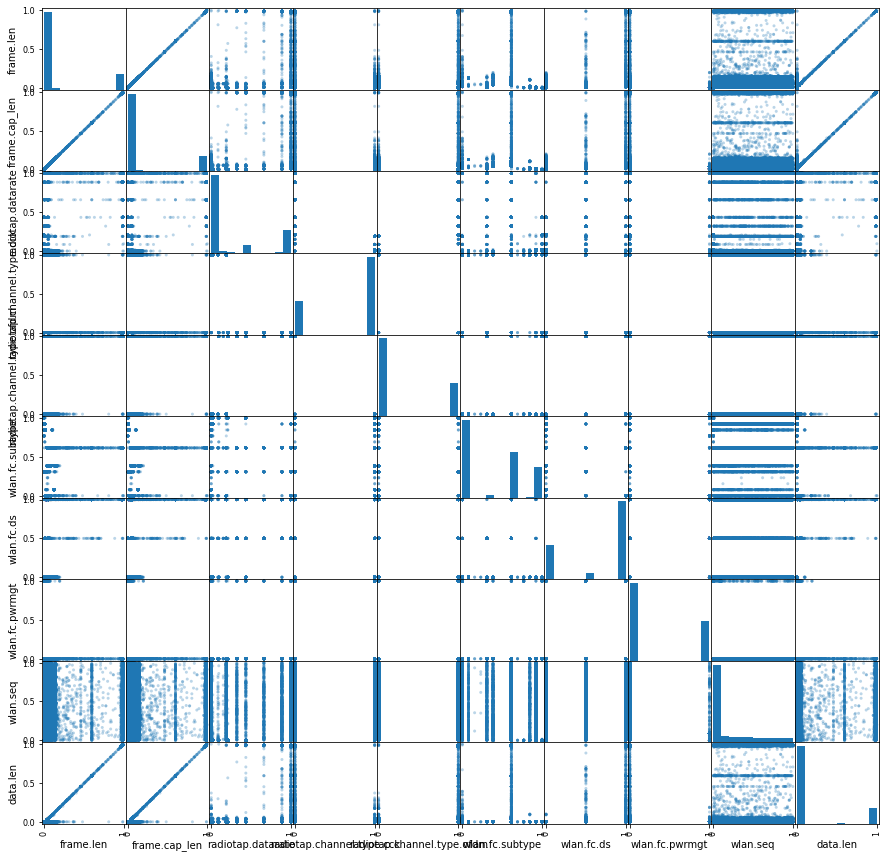

In [12]:
scatter_matrix(train_df[Kbest_col_list], figsize = (15,15), alpha = 0.3)
plt.show()

In [13]:
# Function to plot specific correlations
def show_corr_matrix(corr, labels):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(len(labels))
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(labels, rotation = 90)
    ax.set_yticklabels(labels)
    plt.show()          

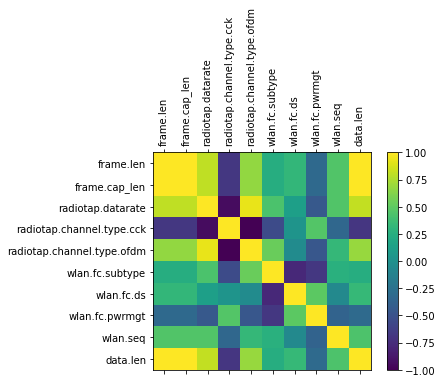

In [14]:
correlations = train_df[Kbest_col_list].corr(method = 'pearson')

show_corr_matrix(correlations, Kbest_col_list)

### Splitting into 4 Subcategories for review

In [15]:
#create lists of the groups of data, include class in all, using train_data df with zero std columns removed.
frame_lst = ['class']
radiotap_lst = ['class']
wlan_lst = ['class']
wlan_mgmt_lst = ['class']
for column in train_data.columns:
    if column.startswith('frame.'):
        frame_lst.append(column)
    elif column.startswith('radiotap.'):
        radiotap_lst.append(column)
    elif column.startswith('wlan.'):
        wlan_lst.append(column)
    elif column.startswith('wlan_mgt.'):
        wlan_mgmt_lst.append(column)

print(len(frame_lst))
print(len(radiotap_lst))
print(len(wlan_lst))
print(len(wlan_mgmt_lst))

#make correlations for each list
frame_corr = train_data[frame_lst].corr(method = 'pearson')
radiotap_corr = train_data[radiotap_lst].corr(method = 'pearson')
wlan_corr = train_data[wlan_lst].corr(method = 'pearson')
wlan_mgmt_corr = train_data[wlan_mgmt_lst].corr(method = 'pearson')



5
17
28
31


## Review data summary by sub cat

### Frame

In [16]:
#Understand spread of data in each category/list: frame
train_df[frame_lst].head(10)

,class,frame.time_delta,frame.time_delta_displayed,frame.len,frame.cap_len
0,0,6.570e-05,6.570e-05,0.009,0.009
1,0,1.430e-05,1.430e-05,0.000,0.000
2,0,3.553e-02,3.553e-02,0.071,0.071
3,0,5.128e-03,5.128e-03,0.095,0.095
4,0,3.512e-02,3.512e-02,0.071,0.071
5,0,5.099e-03,5.099e-03,0.095,0.095
6,0,2.013e-02,2.013e-02,0.073,0.073
7,0,1.408e-01,1.408e-01,0.144,0.144
8,0,4.916e-03,4.916e-03,0.095,0.095
9,0,3.414e-02,3.414e-02,0.071,0.071


In [17]:
train_df[frame_lst].describe()

,class,frame.time_delta,frame.time_delta_displayed,frame.len,frame.cap_len
count,97044.0,9.704e+04,9.704e+04,97044.000,97044.000
mean,0.5,6.252e-03,6.252e-03,0.194,0.194
std,0.5,1.554e-02,1.554e-02,0.354,0.354
min,0.0,2.860e-06,2.860e-06,0.000,0.000
25%,0.0,1.442e-03,1.442e-03,0.038,0.038
50%,0.5,3.706e-03,3.706e-03,0.038,0.038
75%,1.0,5.916e-03,5.916e-03,0.055,0.055
max,1.0,9.784e-01,9.784e-01,1.000,1.000


In the "frame" subset, frame.len and frame.cap_len appear to contain the same data. Also frame.time_delta and frame.time_delta_displayed seem to contain the same data. (The other columns have been removed as std is zero.) Therefore only 2 of these may be useful: frame.time_delta and frame.len, The former contains very small numbers and the latter contains values between 0 and 1.

### Radiotap

In [18]:
#Understand spread of data in each category/list: radiotap
train_df[radiotap_lst].describe()

,class,radiotap.length,radiotap.present.tsft,radiotap.present.flags,radiotap.present.channel,radiotap.present.dbm_antsignal,radiotap.present.antenna,radiotap.present.rxflags,radiotap.mactime,radiotap.flags.fcs,radiotap.datarate,radiotap.channel.freq,radiotap.channel.type.cck,radiotap.channel.type.ofdm,radiotap.channel.type.2ghz,radiotap.dbm_antsignal,radiotap.antenna
count,97044.0,97044.000,97044.000,97044.000,97044.000,97044.000,97044.000,97044.000,97044.000,97044.000,97044.000,97044.000,97044.000,97044.000,97044.000,97044.000,97044.000
mean,0.5,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.714,1.000,0.251,0.981,0.702,0.298,1.000,0.621,1.000
std,0.5,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.110,0.015,0.405,0.014,0.458,0.457,0.015,0.117,0.015
min,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.654,1.000,0.000,0.981,0.000,0.000,1.000,0.634,1.000
50%,0.5,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.757,1.000,0.000,0.981,1.000,0.000,1.000,0.648,1.000
75%,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.768,1.000,0.434,0.981,1.000,1.000,1.000,0.676,1.000
max,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.934,1.000,1.000,0.993,1.000,1.000,1.000,1.000,1.000


The radiotap subset appears to contain 10 features (out of 16) that have identical summary statistics; std 0.15, min 0, max 1, suggesting binary data of 0 or 1, but mostly 1s. The remaining 6 features appear to contain different information but mostly ranging between 0 and 1.

### Wlan

In [19]:
#Understand spread of data in each category/list: wlan
train_df[wlan_lst].describe()

,class,wlan.fc.type_subtype,wlan.fc.type,wlan.fc.subtype,wlan.fc.ds,wlan.fc.retry,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.duration,wlan.ra,wlan.da,wlan.ta,wlan.sa,wlan.bssid,wlan.seq,wlan.bar.type,wlan.ba.control.ackpolicy,wlan.ba.control.cbitmap,wlan.ba.bm,wlan.fcs_good,wlan.wep.iv,wlan.wep.key,wlan.wep.icv,wlan.tkip.extiv,wlan.ccmp.extiv,wlan.qos.tid,wlan.qos.priority
count,97044.0,97044.000,97044.000,97044.000,97044.000,97044.000,97044.000,97044.000,97044.000,97044.000,9.704e+04,97044.000,97044.000,97044.000,97044.000,97044.000,9.704e+04,9.704e+04,9.704e+04,9.704e+04,97044.000,97044.000,97044.000,97044.000,97044.000,9.704e+04,97044.000,97044.000
mean,0.5,0.677,0.778,0.377,0.685,0.075,0.341,0.001,0.704,0.003,3.294e-03,0.024,0.002,0.004,0.001,0.226,2.061e-05,6.183e-05,8.244e-05,1.449e-05,1.000,0.273,0.004,0.261,0.006,3.463e-04,0.028,0.028
std,0.5,0.220,0.374,0.395,0.450,0.264,0.474,0.032,0.456,0.009,2.101e-02,0.075,0.018,0.018,0.006,0.271,4.540e-03,7.863e-03,9.079e-03,2.451e-03,0.015,0.260,0.036,0.262,0.060,1.331e-02,0.063,0.063
min,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000
25%,0.0,0.659,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.634e-04,0.006,0.002,0.001,0.001,0.084,0.000e+00,0.000e+00,0.000e+00,0.000e+00,1.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000
50%,0.5,0.727,1.000,0.308,1.000,0.000,0.000,0.000,1.000,0.000,5.634e-04,0.006,0.002,0.004,0.001,0.089,0.000e+00,0.000e+00,0.000e+00,0.000e+00,1.000,0.326,0.000,0.201,0.000,0.000e+00,0.000,0.000
75%,1.0,0.727,1.000,0.615,1.000,0.000,1.000,0.000,1.000,0.003,2.253e-03,0.018,0.002,0.005,0.001,0.323,0.000e+00,0.000e+00,0.000e+00,0.000e+00,1.000,0.447,0.000,0.418,0.000,0.000e+00,0.000,0.000
max,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,9.910e-01,0.918,0.996,0.996,0.539,1.000,1.000e+00,1.000e+00,1.000e+00,4.688e-01,1.000,1.000,1.000,1.000,0.994,8.656e-01,1.000,1.000


As with the other subsets, the wlan subset is dominated by features that range between 0 and 1. Although these appear to have differing spread and frequency. There are 5 of the 27 features that contain very small numbers. The last 2 features, wlan.qos.tid and wlan.qos.priority appear to contain the same data.

### Wlan

In [20]:
#Understand spread of data in each category/list: wlan_mgmt
train_df[wlan_mgmt_lst].describe()

,class,wlan_mgt.fixed.capabilities.ess,wlan_mgt.fixed.capabilities.privacy,wlan_mgt.fixed.capabilities.preamble,wlan_mgt.fixed.capabilities.spec_man,wlan_mgt.fixed.capabilities.short_slot_time,wlan_mgt.fixed.listen_ival,wlan_mgt.fixed.current_ap,wlan_mgt.fixed.status_code,wlan_mgt.fixed.timestamp,wlan_mgt.fixed.beacon,wlan_mgt.fixed.aid,wlan_mgt.fixed.reason_code,wlan_mgt.fixed.auth.alg,wlan_mgt.fixed.auth_seq,wlan_mgt.fixed.category_code,wlan_mgt.fixed.sequence,wlan_mgt.tagged.all,wlan_mgt.ssid,wlan_mgt.ds.current_channel,wlan_mgt.tim.dtim_count,wlan_mgt.tim.dtim_period,wlan_mgt.tim.bmapctl.multicast,wlan_mgt.country_info.environment,wlan_mgt.rsn.version,wlan_mgt.rsn.gcs.type,wlan_mgt.rsn.pcs.count,wlan_mgt.rsn.akms.count,wlan_mgt.rsn.akms.type,wlan_mgt.rsn.capabilities.ptksa_replay_counter,wlan_mgt.tcprep.trsmt_pow
count,97044.0,97044.000,97044.000,97044.000,9.704e+04,97044.000,97044.000,9.704e+04,9.704e+04,97044.000,9.704e+04,9.704e+04,9.704e+04,9.704e+04,97044.000,9.704e+04,9.704e+04,97044.000,9.704e+04,97044.000,9.704e+04,9.704e+04,9.704e+04,9.704e+04,9.704e+04,9.704e+04,9.704e+04,9.704e+04,97044.000,9.704e+04,97044.000
mean,0.5,0.087,0.053,0.028,1.030e-05,0.086,0.003,1.030e-05,7.502e-04,0.002,1.215e-04,6.664e-04,7.636e-06,4.534e-04,0.002,1.325e-05,6.494e-06,0.090,3.359e-04,0.037,2.127e-05,1.823e-04,6.183e-04,4.944e-04,3.317e-07,1.690e-04,6.422e-07,3.403e-07,0.022,1.030e-05,0.500
std,0.5,0.282,0.224,0.165,3.210e-03,0.280,0.058,1.966e-03,2.549e-02,0.016,4.137e-04,1.100e-02,2.977e-05,2.129e-02,0.033,2.383e-03,9.109e-04,0.286,1.152e-02,0.126,3.109e-04,9.980e-04,2.486e-02,1.273e-02,2.236e-06,1.139e-03,4.367e-06,2.294e-06,0.145,3.210e-03,0.001
min,0.0,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.000,0.000e+00,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000e+00,0.500
25%,0.0,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.000,0.000e+00,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000e+00,0.500
50%,0.5,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.000,0.000e+00,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000e+00,0.500
75%,1.0,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.000,0.000e+00,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000e+00,0.500
max,1.0,1.000,1.000,1.000,1.000e+00,1.000,1.000,5.000e-01,8.667e-01,0.200,1.530e-03,6.667e-01,1.252e-04,1.000e+00,1.000,4.286e-01,1.561e-01,1.000,9.948e-01,1.000,4.566e-03,7.937e-03,1.000e+00,3.333e-01,1.540e-05,1.569e-02,3.090e-05,1.580e-05,1.000,1.000e+00,0.880


The subset of wlan_mgmt again contains very small numbers and numbers between 0 and 1. Therefore none of the data in the dataset is over 1. Consider this for data preparation.  In terms of outliers, there may be few. May help understand which method of transformation performs the best for modelling. 

## Review data visualisation for each subcat

### Frame

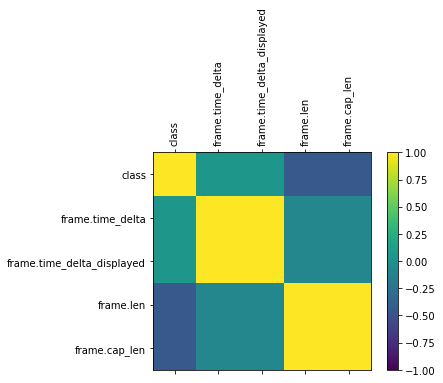

In [21]:
#correlations
show_corr_matrix(frame_corr, frame_lst)

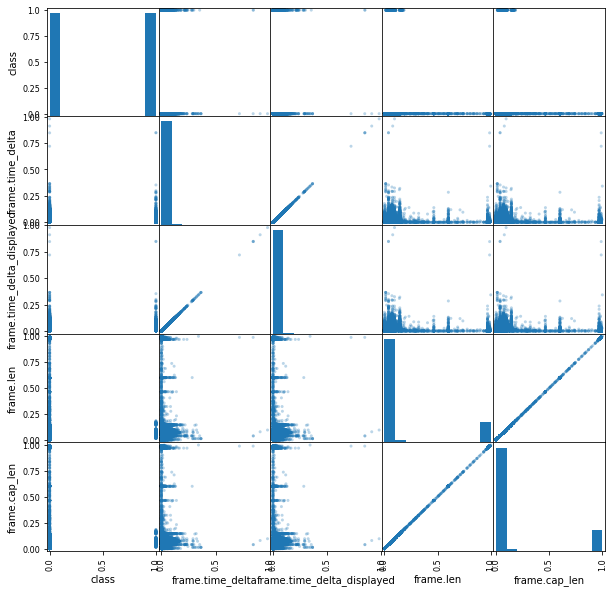

In [22]:
#scatterplots
scatter_matrix(train_data[frame_lst], alpha = 0.3, figsize = (10,10))
plt.show()

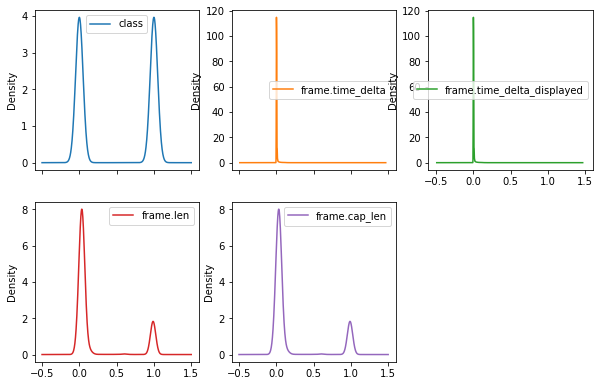

In [23]:
#density plots
train_data[frame_lst].plot(kind='density', subplots = True, sharex = True, layout = (3,3), figsize = (10,10))
plt.show()

### Radiotap

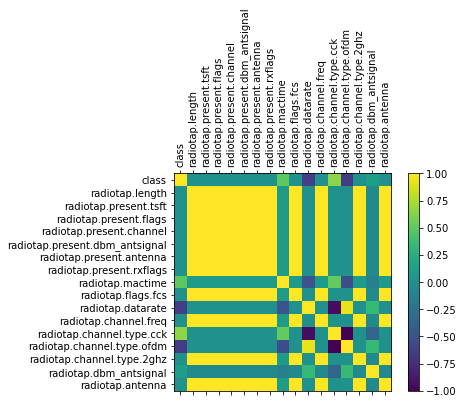

In [24]:
#correlations
show_corr_matrix(radiotap_corr, radiotap_lst)

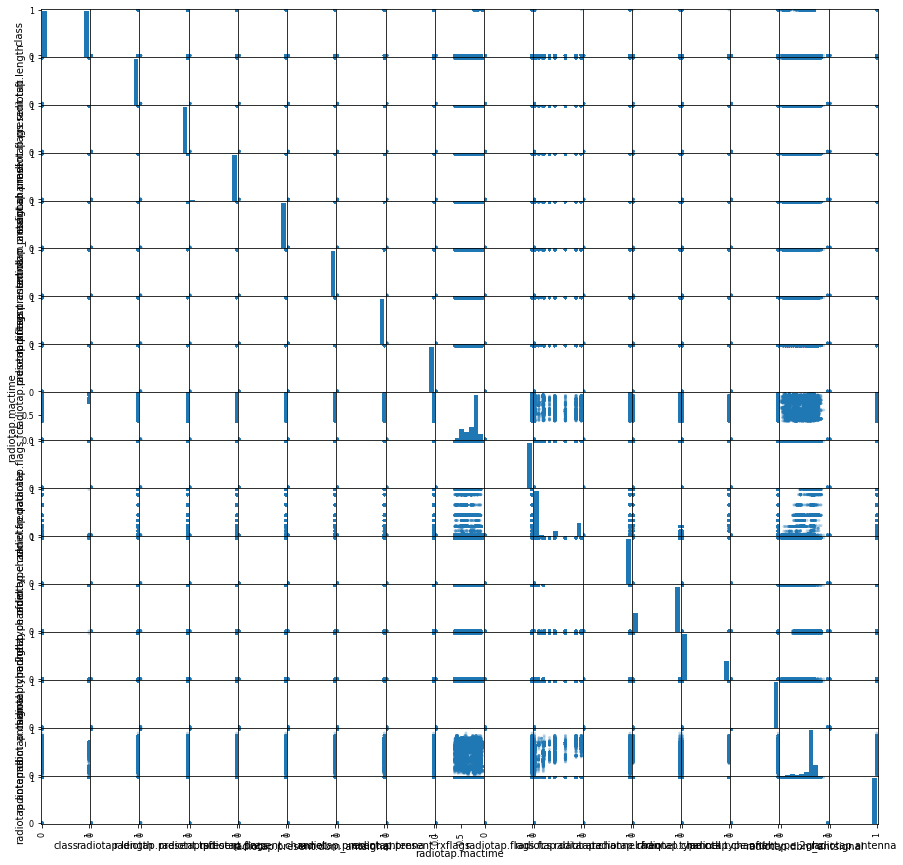

In [25]:
#scatterplots
scatter_matrix(train_data[radiotap_lst], alpha = 0.3, figsize = (15,15))
plt.show()

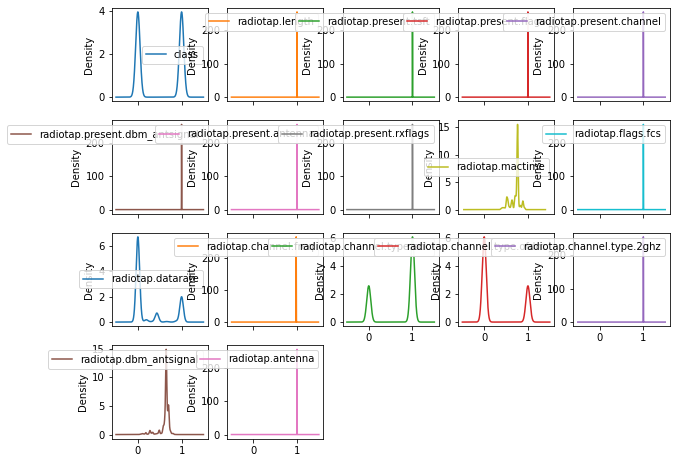

In [26]:
#density plots
train_data[radiotap_lst].plot(kind='density', subplots = True, sharex = True, layout = (5,5), figsize = (10,10))
plt.show()

### Wlan

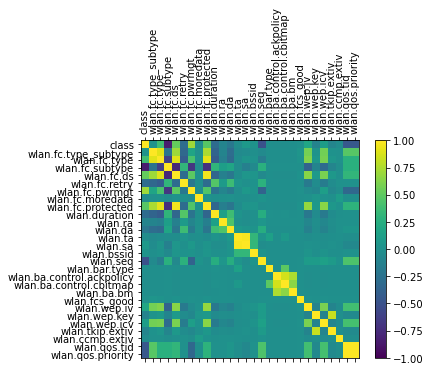

In [27]:
#correlation
show_corr_matrix(wlan_corr, wlan_lst)

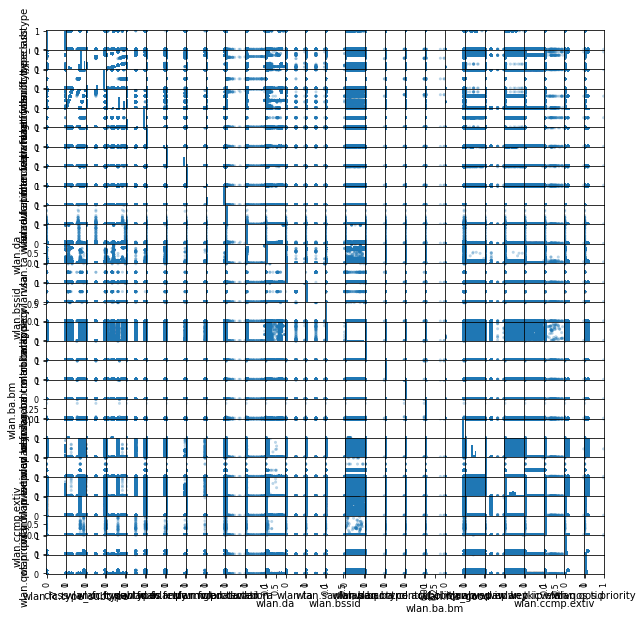

In [28]:
#scatterplots
scatter_matrix(train_data[wlan_lst], alpha = 0.3, figsize = (10,10))
plt.show()

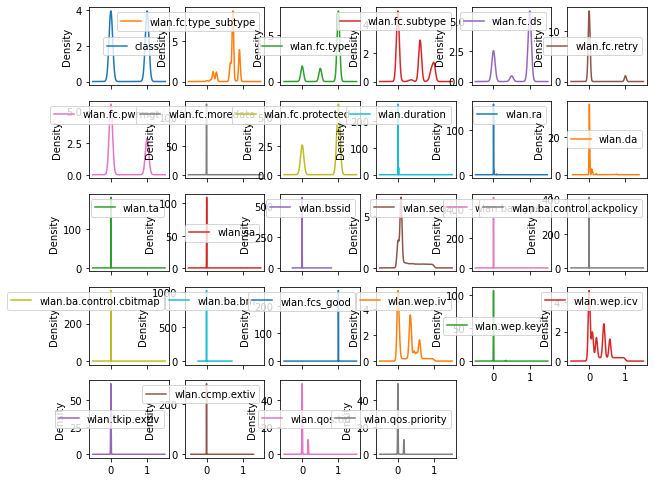

In [29]:
#density plots
train_data[wlan_lst].plot(kind='density', subplots = True, sharex = True, layout = (6,6), figsize = (10,10))
plt.show()

### Wlan_mgmt

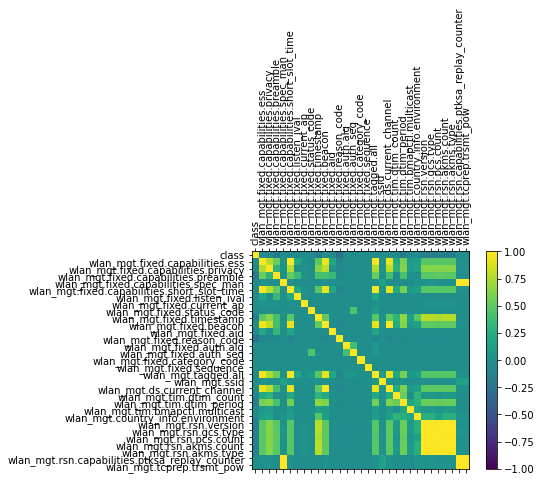

In [30]:
#correlation
show_corr_matrix(wlan_mgmt_corr, wlan_mgmt_lst)

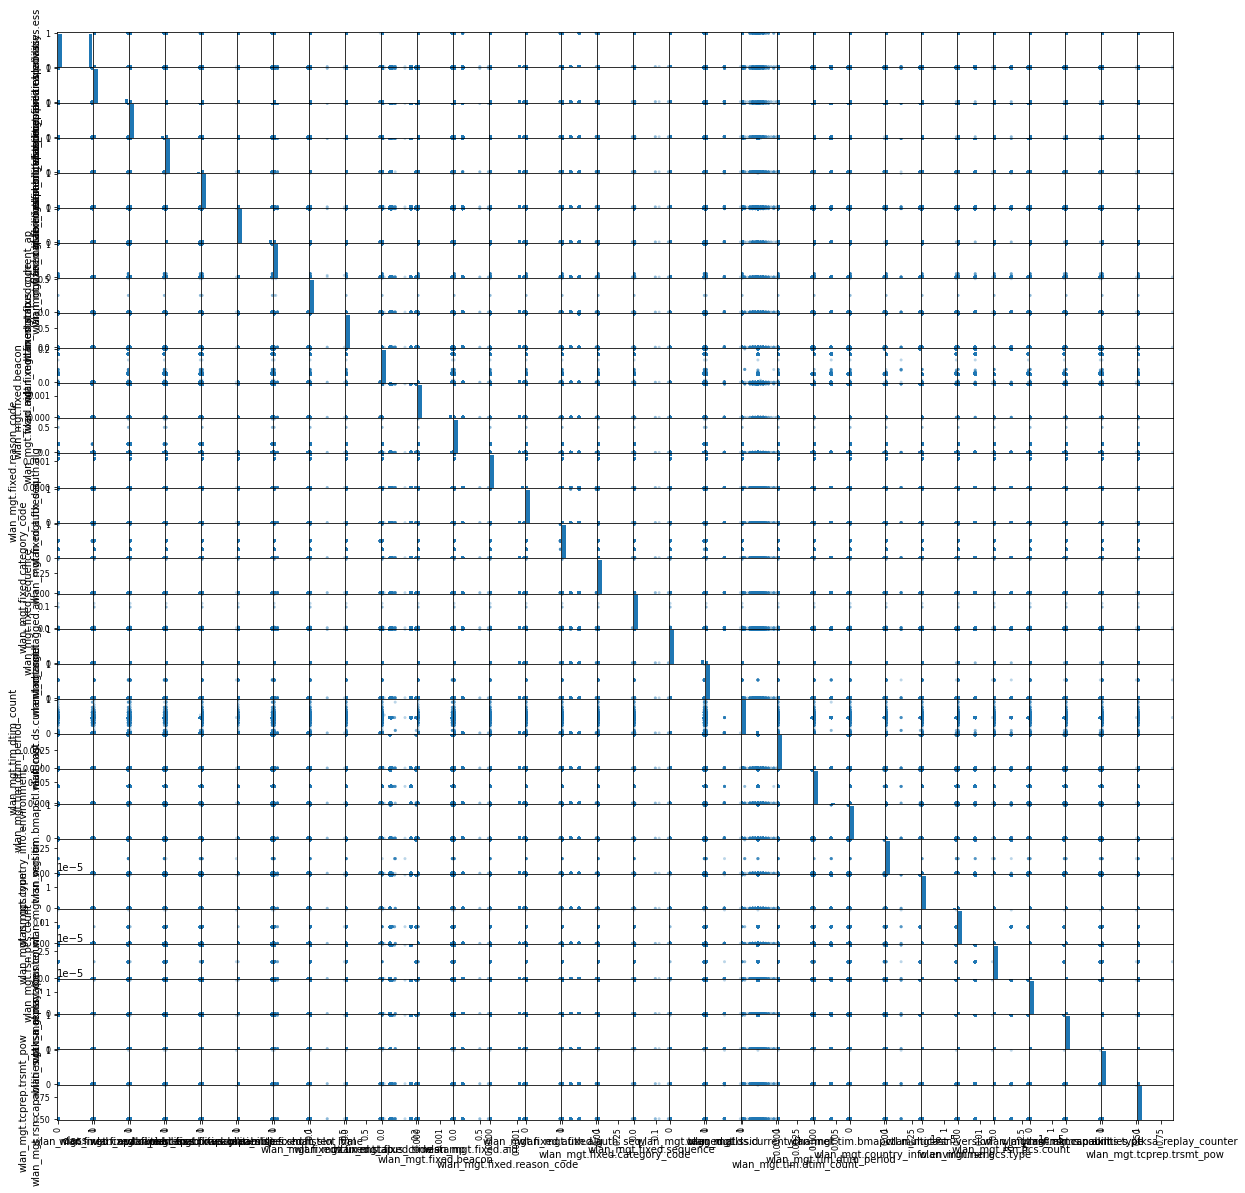

In [31]:
#scatterplots
scatter_matrix(train_data[wlan_mgmt_lst], alpha = 0.3, figsize = (20,20))
plt.show()

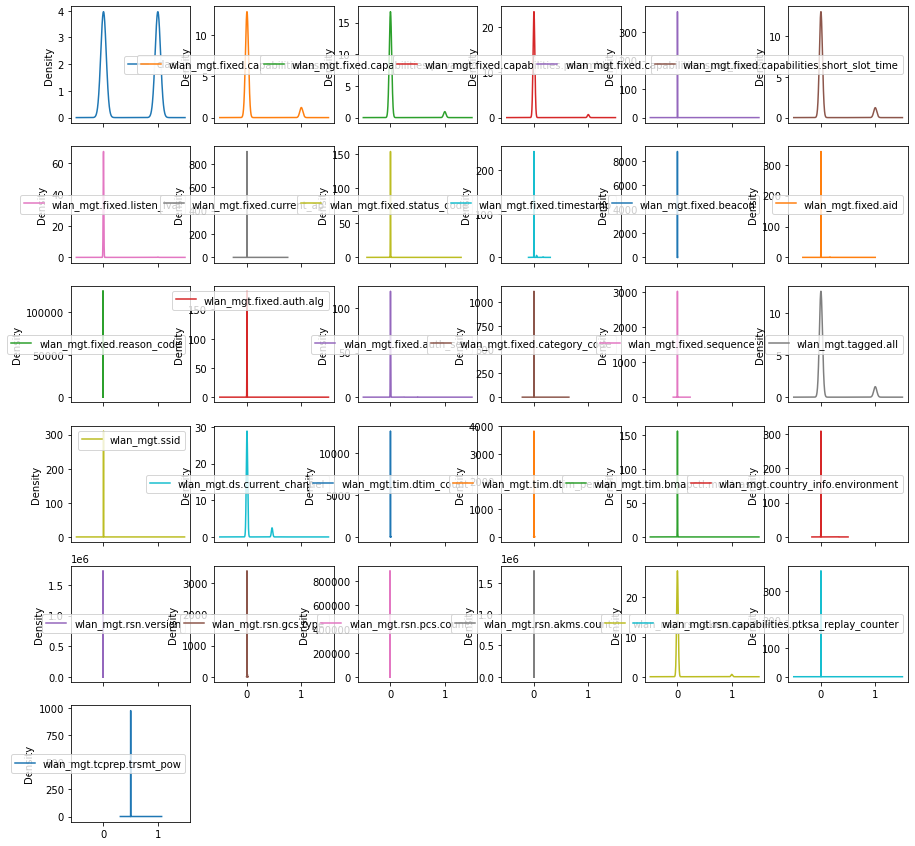

In [32]:
#density plots
train_data[wlan_mgmt_lst].plot(kind='density', subplots = True, sharex = True, layout = (6,6), figsize = (15,15))
plt.show()